In [46]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
#固定种子
np.random.seed(0)

class LinearRegressionself:
    def __init__(self):
        self.w = None
        self.n_features = None
    
    def fit1(self,X,y):
        assert isinstance(X,np.ndarray) and isinstance(y,np.ndarray)
        assert X.ndim ==2 and y.ndim ==1
        assert y.shape[0]==X.shape[0]
        assert X.shape[1]<=1 
        X = X.squeeze()
        x_mean = np.mean(X)
        y_mean = np.mean(y)
        xy_mean = np.mean(X*y)
        xx_mean = np.mean(X*X)
        w = ((x_mean*y_mean)-xy_mean)/(x_mean**2-xx_mean)
        b = y_mean-w*x_mean
        self.w =[w,b]

    def fit2(self,X,y):
        #3.11
        assert isinstance(X,np.ndarray) and isinstance(y,np.ndarray)
        assert X.ndim ==2 and y.ndim ==1
        assert y.shape[0]==X.shape[0]
        n_samples = X.shape[0]
        self.n_features = X.shape[1]
        extra = np.ones((n_samples,))
        X = np.c_[X,extra]
        if self.n_features<n_samples:
            self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        else:
            raise ValueError('do not have enough samples')
    
    def predict(self,X):
        n_samples = X.shape[0]
        extra = np.ones((n_samples,))
        X = np.c_[X,extra]
        if self.w is None:
            raise RuntimeError('can not predict before fit')
        y_ = X.dot(self.w)
        return y_


<function matplotlib.pyplot.show(*args, **kw)>

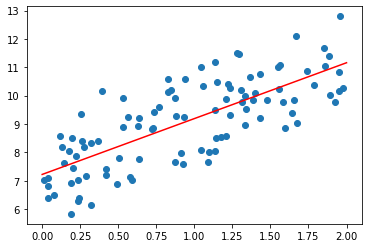

In [48]:
#train and test
#photo

X = 2*np.random.rand(100,1)
y = (7+2*X+np.random.randn(100,1)).squeeze()
lr = LinearRegressionself()
lr.fit2(X,y)
X_new = np.array([[0],[2]])
y_predict = lr.predict(X_new)
plt.scatter(X,y)
plt.plot(X_new,y_predict,'r-')
plt.show

参数w: [[1.67363746]]
参数b: [0.19050306]


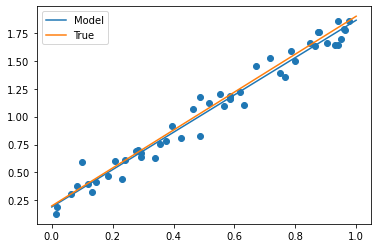

In [49]:
#2  sklearn
from sklearn.linear_model import LinearRegression

def true_fun(X):
    return 1.7*X+0.2

n_samples  = 50
#生成随机数据 
X_train = np.sort(np.random.rand(n_samples))
Y_train = (true_fun(X_train)+np.random.randn(n_samples)*0.1).reshape(n_samples,1)
model = LinearRegression()
model.fit(X_train[:,np.newaxis],Y_train)

print("参数w:",model.coef_)
print("参数b:",model.intercept_)

X_test = np.linspace(0,1,100)

#figure
plt.plot(X_test,model.predict(X_test[:,np.newaxis]),label = 'Model')
plt.plot(X_test,true_fun(X_test),label = 'True')
plt.scatter(X_train,Y_train)
plt.legend(loc = 'best')
plt.show()

In [50]:
# 任务二
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

class LogisticRegression:
    def __init__(self,max_iter=100,use_matrix=True):
        self.beta=None 
        self.n_features=None  
        self.max_iter=max_iter  
        self.use_Hessian=use_matrix 
        
    def fit(self,X,y):
        n_samples=X.shape[0]
        self.n_features=X.shape[1]
        extra=np.ones((n_samples,))
        X=np.c_[X,extra]
        self.beta=np.random.random((X.shape[1],))
        for i in range(self.max_iter): 
            if self.use_Hessian is not True:
                dldbeta=self._dldbeta(X,y,self.beta)
                dldldbetadbeta=self._dldldbetadbeta(X,self.beta)
                self.beta-=(1./dldldbetadbeta*dldbeta)
            else:
                dldbeta = self._dldbeta(X, y, self.beta)
                dldldbetadbeta = self._dldldbetadbeta_matrix(X, self.beta)
                self.beta -= (np.linalg.inv(dldldbetadbeta).dot(dldbeta))

    @staticmethod
    def _dldbeta(X,y,beta):
        m=X.shape[0]
        sum=np.zeros(X.shape[1],).T
        for i in range(m):
            sum+=X[i]*(y[i]-np.exp(X[i].dot(beta))/(1+np.exp(X[i].dot(beta))))
        return -sum

    @staticmethod
    def _dldldbetadbeta_matrix(X,beta):
        m=X.shape[0]
        Hessian=np.zeros((X.shape[1],X.shape[1])) 
        for i in range(m):
            p1 = np.exp(X[i].dot(beta)) / (1 + np.exp(X[i].dot(beta)))
            tmp=X[i].reshape((-1,1))
            Hessian+=tmp.dot(tmp.T)*p1*(1-p1)
        return Hessian

    @staticmethod
    def _dldldbetadbeta(X,beta):
        m=X.shape[0]
        sum=0.
        for i in range(m):
            p1=np.exp(X[i].dot(beta))/(1+np.exp(X[i].dot(beta)))
            sum+=X[i].dot(X[i].T)*p1*(1-p1)
        return sum

    def predict_proba(self,X):
        n_samples = X.shape[0]
        extra = np.ones((n_samples,))
        X = np.c_[X, extra]
        if self.beta is None:
            raise RuntimeError('cant predict before fit')
        p1 = np.exp(X.dot(self.beta)) / (1 + np.exp(X.dot(self.beta)))
        p0 = 1 - p1
        return np.c_[p0,p1]

    def predict(self,X):
        p=self.predict_proba(X)
        res=np.argmax(p,axis=1)  
        return res    

accuracy: 0.8830409356725146


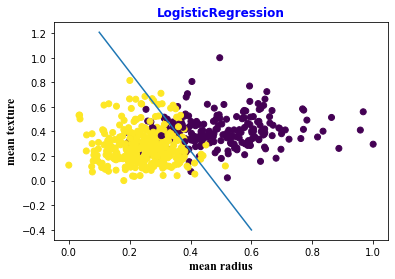

In [51]:
breast_data = load_breast_cancer() 

X, y = breast_data.data[:,:2], breast_data.target  


X = MinMaxScaler().fit_transform(X)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logisticreg = LogisticRegression(max_iter=100,use_matrix=True)
logisticreg.fit(X_train, y_train)  

lda_prob = logisticreg.predict_proba(X_test)  
lda_pred = logisticreg.predict(X_test)  

print('accuracy:', len(y_test[y_test == lda_pred]) * 1. / len(y_test))  
# 可视化
x_ponits = np.array([0.1, 0.6])
y_ = -(logisticreg.beta[0]*x_ponits + logisticreg.beta[2])/logisticreg.beta[1]
# 
plt.title("LogisticRegression", fontsize='large', fontweight='bold', color='b')

# 
font = {'family': 'Times New Roman', 'weight': 'normal', 'size': 12}
plt.xlabel(breast_data.feature_names[0], font) 
plt.ylabel(breast_data.feature_names[1], font) 

plt.plot(x_ponits, y_)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [52]:
X1 = breast_data.data
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y,test_size=0.3)
X1_train,X1_test,y1_train,y1_test = torch.from_numpy(X1_train),torch.from_numpy(X1_test),torch.from_numpy(y1_train),torch.from_numpy(y1_test)
X1_train,X1_test,y1_train,y1_test = torch.tensor(X1_train,dtype=torch.float32),torch.tensor(X1_test,dtype=torch.float32),torch.tensor(y1_train,dtype=torch.float32),torch.tensor(y1_test,dtype=torch.float32)

X_train, X_test, y_train, y_test = torch.from_numpy(X_train),torch.from_numpy(X_test),torch.from_numpy(y_train),torch.from_numpy(y_test)
X_train, X_test, y_train, y_test = torch.tensor(X_train,dtype=torch.float32),torch.tensor(X_test,dtype=torch.float32),torch.tensor(y_train,dtype=torch.float32),torch.tensor(y_test,dtype=torch.float32)


#利用30 个特征 训练 逻辑回归
#利用两个进行训练
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.fc = nn.Linear(2,1)
        self.sig = nn.Sigmoid()
    
    def forward(self,x):
        out = self.fc(x)
        out = self.sig(out)
        return out
class Model2(nn.Module):
    def __init__(self):
        super(Model2,self).__init__()
        self.fc = nn.Linear(30,1)
        self.sig = nn.Sigmoid()
    
    def forward(self,x):
        out = self.fc(x)
        out = self.sig(out)
        return out

model = Model()
learing_rate = 0.05
epochs = 100
optimizer = torch.optim.Adam(model.parameters(),lr=learing_rate)
# optimizer = torch.optim.Adagrad(torch.nn.parameter(),lr=0.01)
criterion = nn.BCELoss()

<ipython-input-52-99a1cb04c7f7>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X1_train,X1_test,y1_train,y1_test = torch.tensor(X1_train,dtype=torch.float32),torch.tensor(X1_test,dtype=torch.float32),torch.tensor(y1_train,dtype=torch.float32),torch.tensor(y1_test,dtype=torch.float32)
<ipython-input-52-99a1cb04c7f7>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train, X_test, y_train, y_test = torch.tensor(X_train,dtype=torch.float32),torch.tensor(X_test,dtype=torch.float32),torch.tensor(y_train,dtype=torch.float32),torch.tensor(y_test,dtype=torch.float32)


In [53]:
for epoch in range(epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if((epoch+1)%10==0):
        print("Epoch{}: {}".format(epoch+1,loss.item()))

Epoch10: 0.7068942189216614
Epoch20: 0.6700612902641296
Epoch30: 0.632783830165863
Epoch40: 0.5984180569648743
Epoch50: 0.5674101710319519
Epoch60: 0.5389623045921326
Epoch70: 0.5135213732719421
Epoch80: 0.4908078908920288
Epoch90: 0.4706178903579712
Epoch100: 0.45266586542129517


C:\develop\Python\Python38\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([398])) that is different to the input size (torch.Size([398, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


In [54]:
model.eval()
test_y = model(X_test)
count =0
for i in range(171):
    if test_y[i]<0.5:
        test_y[i]= 0. 
    else:
        test_y[i]= 1
for i in range(171):
    if test_y[i]==y_test[i]:
        count+=1

print('accuary:{}'.format(count/len(test_y)))


# print('accuary:',len(test_y[test_y==y1_test])*1./len(test_y))


accuary:0.8245614035087719


In [57]:
model2 = Model2()
learing_rate2 = 0.05
optimizer2 = torch.optim.Adam(model.parameters(),lr=learing_rate2)
# optimizer = torch.optim.Adagrad(torch.nn.parameter(),lr=0.01)
criterion2 = nn.BCELoss()

for epoch in range(epochs):
    y_pred = model2(X1_train)
    loss = criterion2(y_pred,y1_train)
    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()
    if((epoch+1)%10==0):
        print("Epoch{}: {}".format(epoch+1,loss.item()))

#test
model2.eval()
test_y = model(X1_test)
count =0
for i in range(171):
    if test_y[i]<0.5:
        test_y[i]= 0. 
    else:
        test_y[i]= 1
for i in range(171):
    if test_y[i]==y_test[i]:
        count+=1


Epoch10: 36.68341827392578
Epoch20: 36.68341827392578
Epoch30: 36.68341827392578
Epoch40: 36.68341827392578
Epoch50: 36.68341827392578
Epoch60: 36.68341827392578
Epoch70: 36.68341827392578
Epoch80: 36.68341827392578
Epoch90: 36.68341827392578
Epoch100: 36.68341827392578


In [58]:
print('accuary:{}'.format(count/len(test_y)))


accuary:0.6023391812865497
